Columns after anonymization: Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Admission Type', 'Discharge Date', 'Medication', 'result'],
      dtype='object')
Gender distribution:
 Gender
Male      27774
Female    27726
Name: count, dtype: int64


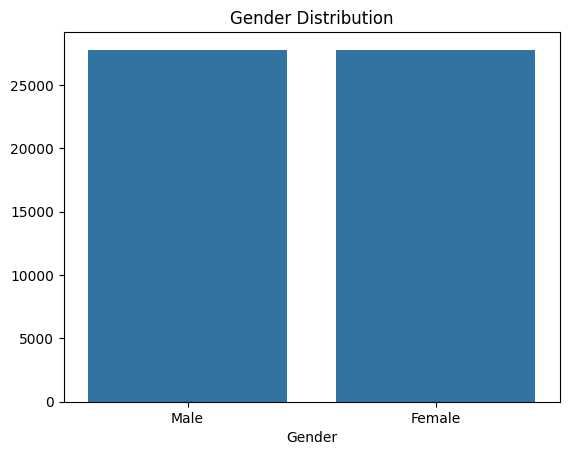

Logistic Regression Train accuracy: 0.338043758043758
Logistic Regression Test accuracy: 0.334954954954955


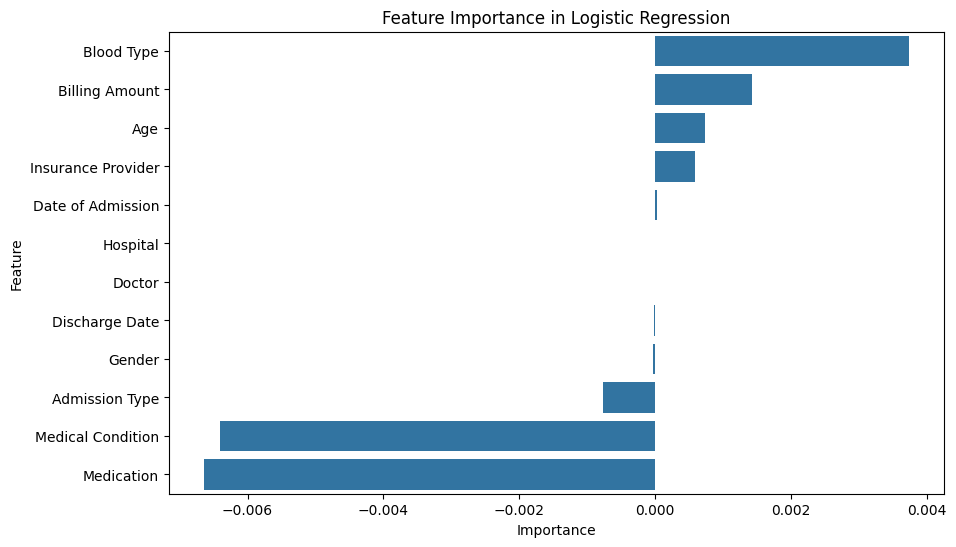

In [13]:
# Import necessary libraries for data handling, preprocessing, modeling, and visualization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the given file path
# Ensure the data is treated securely, especially since it might contain sensitive healthcare information
df = pd.read_csv("C:\\Users\\roy91\\Desktop\\Privacy and Ethics\\healthcare_dataset.csv")

# Step 1: Privacy and GDPR Compliance
# Remove personally identifiable information (PII) such as 'Name' and 'Room Number'
# This ensures that the dataset is GDPR compliant, protecting patient privacy
df_anonymized = df.drop(columns=['Name', 'Room Number'])

# Strip whitespace from column headers (good practice to avoid errors due to trailing/leading spaces)
df_anonymized.columns = df_anonymized.columns.str.strip()

# Check and display the column names after anonymization to verify that PII is removed
print("Columns after anonymization:", df_anonymized.columns)

# Step 2: Data Bias Detection - Gender Distribution
# Check the gender distribution to identify any potential bias in the data
# Imbalanced gender data can lead to biased model predictions
gender_distribution = df_anonymized['Gender'].value_counts()
print("Gender distribution:\n", gender_distribution)

# Visualize the gender distribution to further explore any imbalances
# Data ethics: It is crucial to ensure that models do not reinforce gender biases
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')
plt.show()

# Step 3: Handle categorical columns
# Identify all object (categorical) columns for encoding
# Machine learning models require categorical data to be converted into numerical format
categorical_columns = df_anonymized.select_dtypes(include=['object']).columns.tolist()

# Step 4: Label Encoding of Categorical Variables
# Use LabelEncoder to convert categorical values into numeric codes
# Ethical AI consideration: Make sure that encoding does not introduce unintended biases
le = LabelEncoder()
for col in categorical_columns:
    df_anonymized[col] = le.fit_transform(df_anonymized[col])

# Step 5: Feature Scaling (Numerical Columns)
# Identify all numerical columns for scaling
# Scaling ensures that all features have equal weight, preventing features with large ranges from dominating
numerical_columns = df_anonymized.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df_anonymized[numerical_columns] = scaler.fit_transform(df_anonymized[numerical_columns])

# Step 6: Define Features (X) and Target (y)
# X represents the feature set (all columns except the target), while y is the target ('result')
X = df_anonymized.drop(columns=['result'])  # Features (excluding the target column)
y = df_anonymized['result']  # Target column (the variable we want to predict)

# Step 7: Split Data into Training and Test Sets
# Split the data into 70% training data and 30% testing data
# This ensures that the model is trained on one part of the data and tested on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train Logistic Regression Model
# Train the logistic regression model using the training data
# Logistic Regression is a simple yet powerful model for binary classification tasks
log_reg = LogisticRegression(max_iter=1000)

# Fit the logistic regression model on the training data
log_reg.fit(X_train, y_train)

# Step 9: Make Predictions
# Make predictions on both the training and test sets to evaluate model performance
y_pred_train_log = log_reg.predict(X_train)
y_pred_test_log = log_reg.predict(X_test)

# Step 10: Model Evaluation
# Calculate the accuracy of the model on both training and test sets
# High accuracy on both sets indicates a well-performing model, while large differences suggest overfitting
train_accuracy_log = accuracy_score(y_train, y_pred_train_log)
test_accuracy_log = accuracy_score(y_test, y_pred_test_log)

# Display the training and test accuracy results
print(f"Logistic Regression Train accuracy: {train_accuracy_log}")
print(f"Logistic Regression Test accuracy: {test_accuracy_log}")

# Step 11: Model Explainability - Feature Importance
# Logistic Regression allows us to understand feature importance through its coefficients
# Positive/Negative coefficients indicate how strongly a feature impacts the target outcome
importance = log_reg.coef_[0]

# Create a DataFrame to store feature names and their corresponding importance (coefficients)
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance in the model
# Explainability ensures transparency, allowing us to understand the model's decision-making process
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Logistic Regression')
plt.show()


In [15]:
!!pip install imbalanced-learn

['Collecting imbalanced-learn',
 '  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)',
 'Requirement already satisfied: numpy>=1.17.3 in c:\\users\\roy91\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from imbalanced-learn) (1.26.4)',
 'Requirement already satisfied: scipy>=1.5.0 in c:\\users\\roy91\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from imbalanced-learn) (1.13.1)',
 'Requirement already satisfied: scikit-learn>=1.0.2 in c:\\users\\roy91\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from imbalanced-learn) (1.5.0)',
 'Requirement already satisfied: joblib>=1.1.1 in c:\\users\\roy91\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from imbalanced-learn) (1.4.2)',
 'Requirement already satisfied: threadpoolctl>=2.0.0 in c:\\users\\roy91\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from imbalanced-learn) (3.5.0)',
 'Using cached imbalanced_learn-0.12.3-py3-non

Columns after anonymization: Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Admission Type', 'Discharge Date', 'Medication', 'result'],
      dtype='object')
Gender distribution:
 Gender
Male      27774
Female    27726
Name: count, dtype: int64


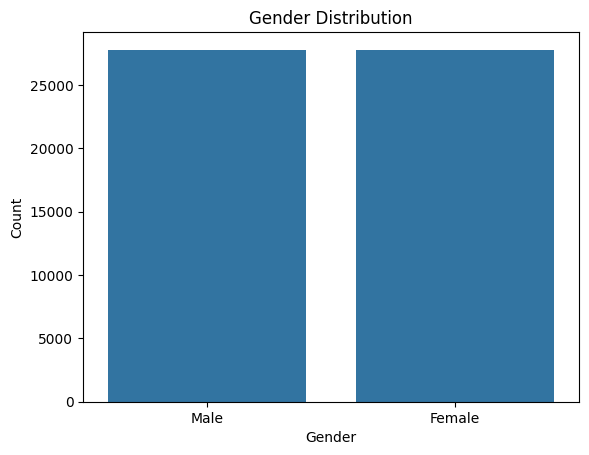

Random Forest Train accuracy: 1.0
Random Forest Test accuracy: 0.4294894894894895
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      5643
           1       0.42      0.43      0.42      5418
           2       0.43      0.40      0.42      5589

    accuracy                           0.43     16650
   macro avg       0.43      0.43      0.43     16650
weighted avg       0.43      0.43      0.43     16650



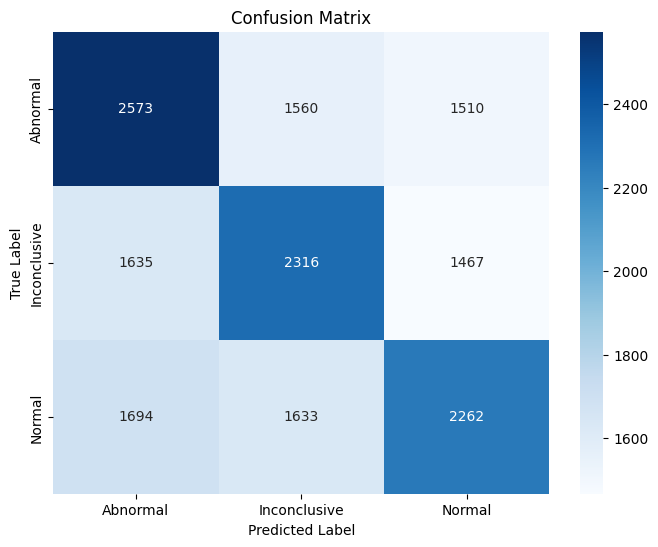

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
## RandomForest ##
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("C:\\Users\\roy91\\Desktop\\Privacy and Ethics\\healthcare_dataset.csv")

# Drop PII columns to ensure GDPR compliance
df_anonymized = df.drop(columns=['Name', 'Room Number'])

# Strip whitespace from column headers
df_anonymized.columns = df_anonymized.columns.str.strip()

# Check the column names
print("Columns after anonymization:", df_anonymized.columns)

# Gender distribution to check for bias
gender_distribution = df_anonymized['Gender'].value_counts()
print("Gender distribution:\n", gender_distribution)

# Visualize the gender distribution
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Select categorical columns for manual encoding
categorical_columns = df_anonymized.select_dtypes(include=['object']).columns.tolist()

# Label Encode the selected categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df_anonymized[col] = le.fit_transform(df_anonymized[col])

# Scale numerical columns (if required)
numerical_columns = df_anonymized.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df_anonymized[numerical_columns] = scaler.fit_transform(df_anonymized[numerical_columns])

# Define X (features) and y (target)
X = df_anonymized.drop(columns=['result'])  # Features
y = df_anonymized['result']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Step 1: Random Forest (Base Model) ---- #
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

# Evaluate performance
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Random Forest Train accuracy: {train_accuracy_rf}")
print(f"Random Forest Test accuracy: {test_accuracy_rf}")
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal', 'Inconclusive', 'Normal'], yticklabels=['Abnormal', 'Inconclusive', 'Normal'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ---- Step 2: Hyperparameter Tuning for Random Forest ---- #
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best estimator after grid search
best_rf = grid_search.best_estimator_
y_pred_test_best_rf = best_rf.predict(X_test)
test_accuracy_best_rf = accuracy_score(y_test, y_pred_test_best_rf)
print(f"Best Random Forest Test accuracy: {test_accuracy_best_rf}")

# ---- Step 3: Cross-Validation ---- #
cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean cross-validated accuracy: {cv_scores.mean()}")

# ---- Step 4: Feature Importance (Random Forest) ---- #
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

# ---- Step 5: Ensemble Model (Random Forest + XGBoost + Logistic Regression) ---- #
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
log_reg = LogisticRegression(max_iter=1000)

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf), ('xgb', xgb_model), ('logreg', log_reg)], voting='soft')

# Train and evaluate the ensemble model
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
test_accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Test accuracy: {test_accuracy_ensemble}")

# Confusion Matrix for Ensemble Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal', 'Inconclusive', 'Normal'], yticklabels=['Abnormal', 'Inconclusive', 'Normal'])
plt.title('Confusion Matrix - Ensemble Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ---- Step 6: Cross-Validation for Ensemble Model ---- #
cv_scores_ensemble = cross_val_score(ensemble_model, X, y, cv=5)
print(f"Cross-validated scores for Ensemble Model: {cv_scores_ensemble}")
print(f"Mean cross-validated accuracy for Ensemble Model: {cv_scores_ensemble.mean()}")


In [21]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 7.6 MB/s eta 0:00:00


Columns after anonymization: Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Admission Type', 'Discharge Date', 'Medication', 'result'],
      dtype='object')
Gender distribution:
 Gender
Male      27774
Female    27726
Name: count, dtype: int64


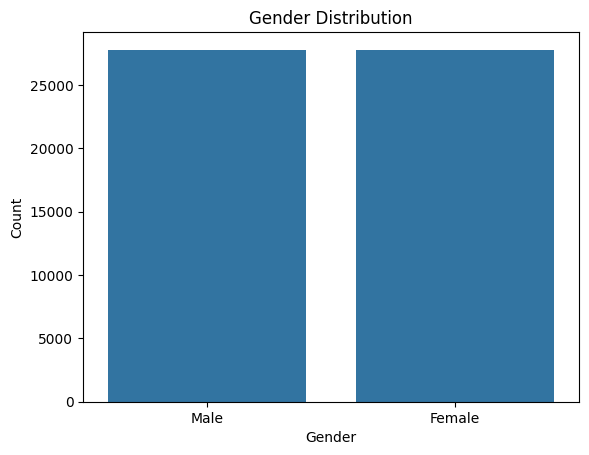


--- Logistic Regression ---
Logistic Regression Train accuracy: 0.33898131033066337
Logistic Regression Test accuracy: 0.3332732732732733

--- RandomForest Classifier ---
RandomForest Train accuracy: 1.0
RandomForest Test accuracy: 0.4236036036036036

--- XGBoost Classifier ---
XGBoost Train accuracy: 0.7346734442390634
XGBoost Test accuracy: 0.3772972972972973

--- LightGBM Classifier ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 38952, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] 

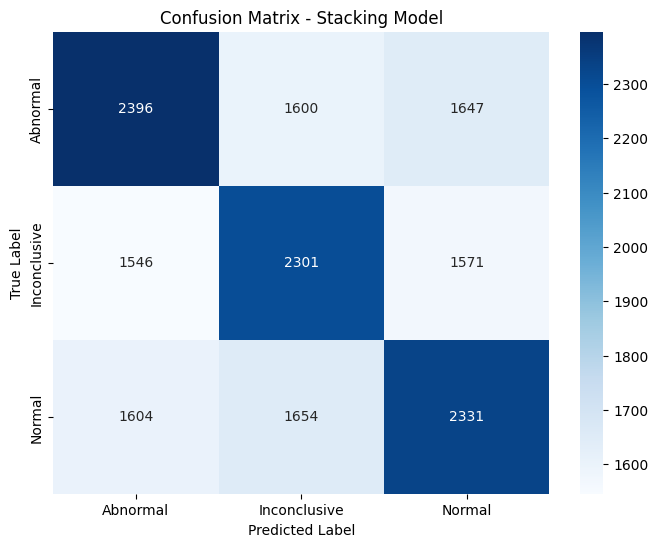

In [23]:
##  MULTIMODEL  ##
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:\\Users\\roy91\\Desktop\\Privacy and Ethics\\healthcare_dataset.csv")

# Drop PII columns to ensure GDPR compliance
df_anonymized = df.drop(columns=['Name', 'Room Number'])

# Strip whitespace from column headers
df_anonymized.columns = df_anonymized.columns.str.strip()

# Display columns after anonymization
print("Columns after anonymization:", df_anonymized.columns)

# Check class distribution for gender bias
gender_distribution = df_anonymized['Gender'].value_counts()
print("Gender distribution:\n", gender_distribution)

# Visualize the gender distribution
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

# Select categorical columns for manual encoding
categorical_columns = df_anonymized.select_dtypes(include=['object']).columns.tolist()

# Label Encode the selected categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df_anonymized[col] = le.fit_transform(df_anonymized[col])

# Scale numerical columns
numerical_columns = df_anonymized.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df_anonymized[numerical_columns] = scaler.fit_transform(df_anonymized[numerical_columns])

# Define X (features) and y (target)
X = df_anonymized.drop(columns=['result'])  # Features
y = df_anonymized['result']  # Target

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SMOTE to handle class imbalance (ensure even class distribution in training data)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Logistic Regression Model
print("\n--- Logistic Regression ---")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)
y_pred_train_log = log_reg.predict(X_train_sm)
y_pred_test_log = log_reg.predict(X_test)

# Train and Test Accuracy
train_accuracy_log = accuracy_score(y_train_sm, y_pred_train_log)
test_accuracy_log = accuracy_score(y_test, y_pred_test_log)
print(f"Logistic Regression Train accuracy: {train_accuracy_log}")
print(f"Logistic Regression Test accuracy: {test_accuracy_log}")

# RandomForest Classifier
print("\n--- RandomForest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)
y_pred_train_rf = rf_model.predict(X_train_sm)
y_pred_test_rf = rf_model.predict(X_test)

# Train and Test Accuracy
train_accuracy_rf = accuracy_score(y_train_sm, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"RandomForest Train accuracy: {train_accuracy_rf}")
print(f"RandomForest Test accuracy: {test_accuracy_rf}")

# XGBoost Classifier
print("\n--- XGBoost Classifier ---")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_sm, y_train_sm)
y_pred_train_xgb = xgb_model.predict(X_train_sm)
y_pred_test_xgb = xgb_model.predict(X_test)

# Train and Test Accuracy
train_accuracy_xgb = accuracy_score(y_train_sm, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(f"XGBoost Train accuracy: {train_accuracy_xgb}")
print(f"XGBoost Test accuracy: {test_accuracy_xgb}")

# LightGBM Classifier
print("\n--- LightGBM Classifier ---")
lgb_model = LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.1, n_estimators=200)
lgb_model.fit(X_train_sm, y_train_sm)
y_pred_train_lgb = lgb_model.predict(X_train_sm)
y_pred_test_lgb = lgb_model.predict(X_test)

# Train and Test Accuracy
train_accuracy_lgb = accuracy_score(y_train_sm, y_pred_train_lgb)
test_accuracy_lgb = accuracy_score(y_test, y_pred_test_lgb)
print(f"LightGBM Train accuracy: {train_accuracy_lgb}")
print(f"LightGBM Test accuracy: {test_accuracy_lgb}")

# Stacking Classifier
print("\n--- Stacking Classifier ---")
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('lgb', LGBMClassifier())
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train_sm, y_train_sm)
y_pred_train_stack = stacking_model.predict(X_train_sm)
y_pred_test_stack = stacking_model.predict(X_test)

# Train and Test Accuracy
train_accuracy_stack = accuracy_score(y_train_sm, y_pred_train_stack)
test_accuracy_stack = accuracy_score(y_test, y_pred_test_stack)
print(f"Stacking Model Train accuracy: {train_accuracy_stack}")
print(f"Stacking Model Test accuracy: {test_accuracy_stack}")

# Confusion Matrix and Classification Report for Stacking Model
print("\nClassification Report for Stacking Model (Test Data):")
print(classification_report(y_test, y_pred_test_stack))

# Plot confusion matrix for Stacking Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_stack), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Abnormal', 'Inconclusive', 'Normal'], yticklabels=['Abnormal', 'Inconclusive', 'Normal'])
plt.title('Confusion Matrix - Stacking Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
